In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService
import math
import pickle

# Load your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

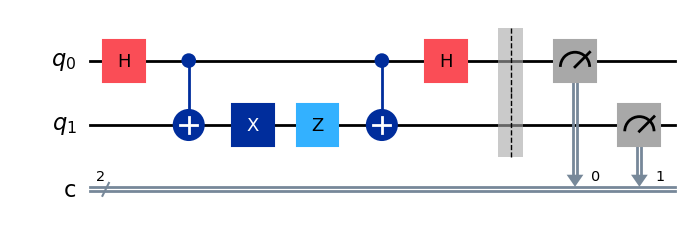

In [5]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.x(1)
qc.z(1)
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.measure([0, 1], [0, 1])
qc.draw('mpl').savefig('results/superdense_circuit.jpg')
qc.draw('mpl')

## Run Superdensecoding circuit on simulated backend without noise

{'11': 1024}


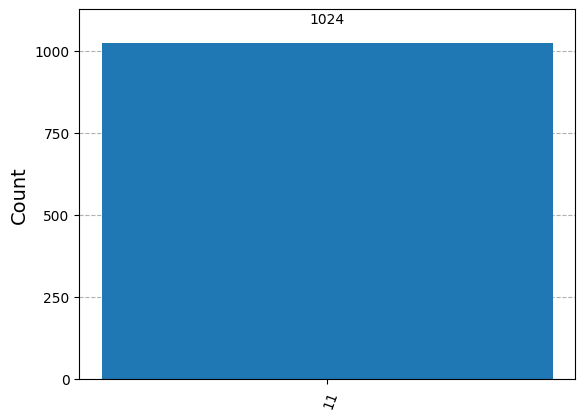

In [7]:
# Run on the qasm simulator
simulator = AerSimulator()
circ = transpile(qc, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)

# Print and plot results
print(counts)
plot_histogram(counts).savefig('results/superdense_ideal.jpg')
plot_histogram(counts)

## Run Superdensecoding circuit on simulated backend with noise model (locally)

{'11': 969, '01': 33, '00': 6, '10': 16}


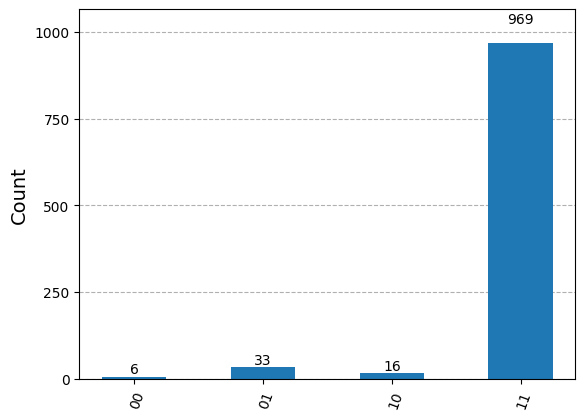

In [8]:
# Simulate a noisy backend, based on a cloud backend
backend = service.backend("ibm_sherbrooke")
sim_sherbrooke = AerSimulator.from_backend(backend)

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_sherbrooke)

# Execute the circuit on the simulated noisy backend and plot results
result_noise = sim_sherbrooke.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
print(counts_noise)
plot_histogram(counts_noise).savefig('results/superdensecoding_noise_local.jpg')
plot_histogram(counts_noise)

## Run Supersense Coding circuit on actual quantum hardware

In [9]:
# Transpile the circuit for the selected backend
backend_name = "ibm_sherbrooke"
backend = service.backend(backend_name)  # Example using a simulator
transpiled_circuit = transpile(qc, backend)

# Execute the circuit
job = backend.run(transpiled_circuit)

# Save the job ID
job_id = job.job_id()

print(f"Job (ID: {job_id}) sent successfully to backend {backend_name}.")
print("Come back after a few hours and retrieve the results with the cell below.")

C:\Users\Sadim\AppData\Local\Temp\ipykernel_7272\1858675374.py:7: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime.
  job = backend.run(transpiled_circuit)


Job (ID: cvpec6gzrwzg008at4g0) sent successfully to backend ibm_sherbrooke.
Come back after a few hours and retrieve the results with the cell below.


### Retrieve job result from the cloud based on job ID

In [12]:
# Monitor the job status on IQP, and run this cell when the sent job has been completed

# Reload the service object, in case the nb starts up fresh
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum")

# Retrieve the job result based on its ID
retrieved_job = service.job('cvpec6gzrwzg008at4g0') # # Put the job ID from the above cell here
job_result = retrieved_job.result()

# Print and plot results
print("Results:")
counts_cloud = job_result.get_counts()
print(counts_cloud)
plot_histogram(counts_cloud).savefig("results/superdensecoding_noise_sherbrooke.jpg")
plot_histogram(counts_cloud)

Results:
{'01': 145, '00': 23, '10': 49, '11': 3783}
